In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import sys

In [2]:
pwd

'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python38-32\\Scripts'

In [5]:
#importing the dataset
data = pd.read_csv("creditcard.csv")

In [6]:
#exploring the dataset
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
data.shape

(284807, 31)

In [10]:
data = data.sample(frac = 0.2, random_state = 1)

In [11]:
data.shape

(56961, 31)

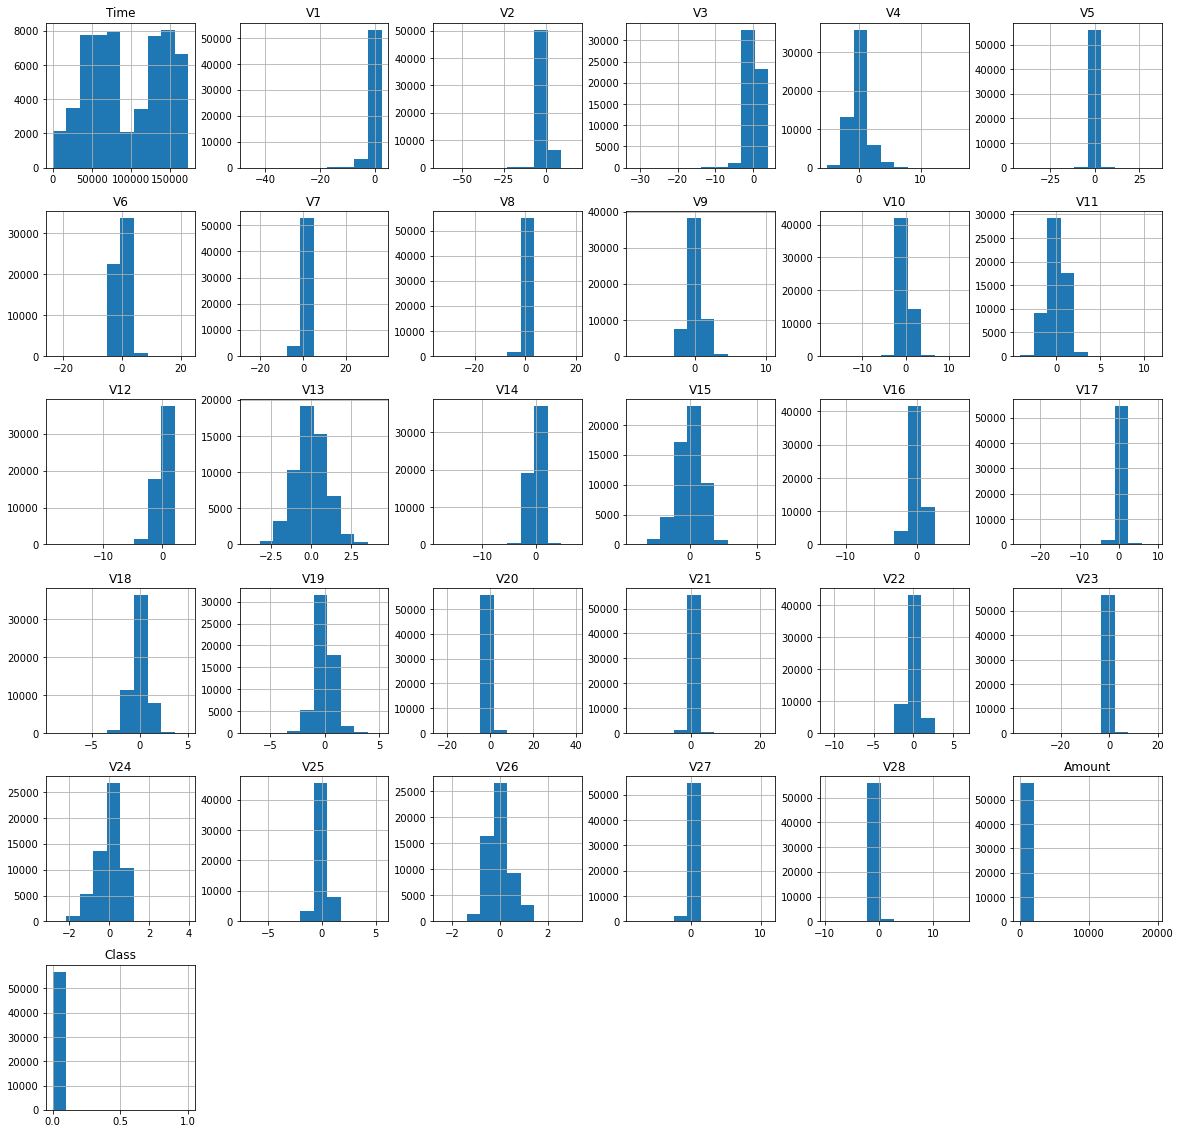

In [12]:
#for better understanding, plotting the histogram of each parameter
data.hist(figsize = (20, 20))
plt.show()

In [13]:
#now determining the number of valid and fraud cases in the dataset
valid = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)
print('Valid Cases: {}'.format(len(valid)))
print('Fraud Cases: {}'.format(len(fraud)))

0.0015296972254457222
Valid Cases: 56874
Fraud Cases: 87


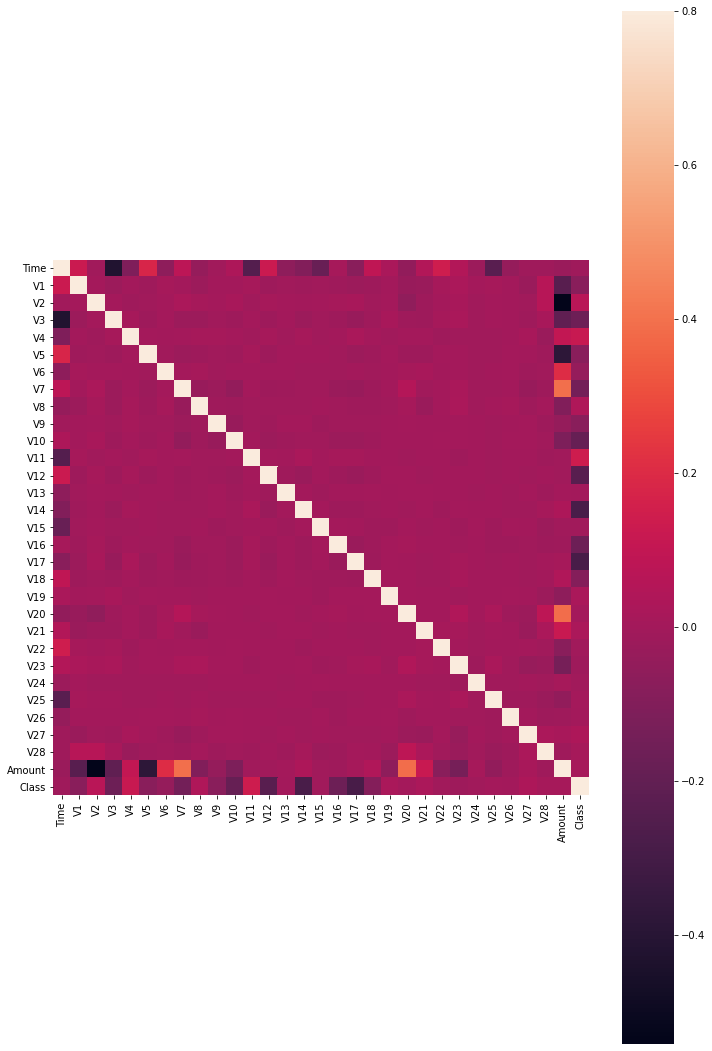

In [15]:
correlation = data.corr()
fig = plt.figure(figsize = (12, 19))
sns.heatmap(correlation, vmax = .8, square = True)
plt.show()

In [16]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)

(56961, 30)
(56961,)


In [17]:
#importing algorithms
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [18]:
state = 1
classifiers = {
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors = 20,
                                               contamination = outlier_fraction)
}

In [19]:
type(classifiers)

dict

In [20]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 127
0.997770404311722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor: 173
0.9969628342199048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

